# Resolviendo el péndulo simple con ayuda de los arreglos de numpy

### En el siguiente código, se hace uso de varias funciones y métodos de numpy para arreglos, fue genial porque me ahorró bastante código, aunque este sea un ejercicio sencillo

Importando cosas importantes

In [247]:
import numpy as np
import matplotlib.pyplot as plt

A continuación, se declara la función Runge_Kutta para resolver la ecuación: 
$ \ddot{\theta} + \omega \theta = 0 $

**Nota: Se usará el algoritmo de 5.7 del libro "Numerical Analysis" de Burden Faires, novena edición**

In [248]:
def Runge_Kutta(a, b, m, n, alpha, f):
    # Definir variables
    h = (b-a)/n
    t = a
    
    w = np.zeros((n+1,m))
    w[0] = np.copy(alpha)
    
    # Definiendo k's (Nos ayudará más adelante en el código) (Es una matriz)
    k = np.zeros((4,m))    
    
    # Agregando todo lo necesario para que Runge_Kutta haga su trabajo
    for i in range(n):
        
        # Generando primera k
        for j in range(m):
            k[0][j] = h*f[j](t, w[i])
            
        # Ajustes para la segunda k
        auxiliar = []
        for j in range(m):
            auxiliar.append(w[i][j] + 1/2*k[0][j])
        
        # Generando segunda k
        for j in range(m):
            k[1][j] = h*f[j](t+h/2, auxiliar)
            
        # Ajustes para la tercer k
        auxiliar = []
        for j in range(m):
            auxiliar.append(w[i][j] + 1/2*k[1][j])
            
        # Generando tercer k
        for j in range(m):
            k[2][j] = h*f[j](t+h/2, auxiliar)
            
        # Ajustes para la cuarta k
        auxiliar = []
        for j in range(m):
            auxiliar.append(w[i][j]+k[2][j])
        
        # Generando cuarta k
        for j in range(m):
            k[3][j] = h*f[j](t+h, auxiliar)
            
        # Generando la aproximación a la solución en el tiempo i-ésimo
        for j in range(m):
            w[i+1][j] = w[i][j] + (k[0][j] + 2*k[1][j] + 2*k[2][j] + k[3][j])/6
        
        t = a + (i+1)*h
        
    # Imprimiento y guardando en un archivo para graficar después la información
    print(w)
    w.tofile("CodigoNumpyData.txt", " ", "%s")

Definimos omega ($\omega$)

Donde $\omega = \sqrt{\frac{g}{l}}$

$g = 9.81 \frac{m}{s^{2}}, l = 1 m$

In [249]:
omega = (9.8)**(1./2.)

Definiendo el sistema de ecuación para introducirlo en la función anterior

In [250]:
def eq1(t, u):
    return u[1]

def eq2(t, u):
    return (-1)*omega*u[0]
    
f = np.array([eq1, eq2])

Ejecutando el método Runge Kutta

**Nota: Las condiciones iniciales para nuestro péndulo serán, ángulo inicial: $\frac{\pi}{4}$, velocidad: 0**

In [252]:
%time Runge_Kutta(a = 0., b = 4*np.pi/omega, m = 2, n = 100, alpha = np.array([np.pi/4, 0]), f = f)

[[ 0.78539816  0.        ]
 [ 0.78341808 -0.09861307]
 [ 0.77748781 -0.1967289 ]
 [ 0.76763725 -0.29385278]
 [ 0.75391608 -0.38949499]
 [ 0.73639348 -0.48317326]
 [ 0.7151578  -0.57441526]
 [ 0.69031613 -0.66276091]
 [ 0.66199371 -0.74776476]
 [ 0.63033335 -0.82899819]
 [ 0.5954947  -0.90605162]
 [ 0.55765342 -0.97853651]
 [ 0.51700032 -1.04608738]
 [ 0.47374037 -1.10836362]
 [ 0.42809171 -1.16505122]
 [ 0.38028451 -1.21586434]
 [ 0.33055982 -1.26054678]
 [ 0.27916836 -1.29887324]
 [ 0.22636927 -1.33065046]
 [ 0.17242877 -1.35571821]
 [ 0.11761884 -1.3739501 ]
 [ 0.06221585 -1.38525419]
 [ 0.00649915 -1.3895735 ]
 [-0.04925032 -1.38688623]
 [-0.10475145 -1.37720595]
 [-0.15972441 -1.36058145]
 [-0.21389199 -1.33709657]
 [-0.26698108 -1.30686972]
 [-0.31872398 -1.27005332]
 [-0.3688598  -1.22683299]
 [-0.41713574 -1.17742667]
 [-0.46330838 -1.12208348]
 [-0.5071449  -1.06108247]
 [-0.54842428 -0.99473122]
 [-0.58693836 -0.9233643 ]
 [-0.62249296 -0.84734154]
 [-0.65490879 -0.76704628]
 

Abriendo el archivo "CodigoNumpyData.txt" y extrayendo la información

In [253]:
%time aux = np.fromfile("CodigoNumpyData.txt", sep=" ")
O = np.array(())
# El código anterior me dio todos los resultados, pero yo sólo necesito los del ángulo, no velocidad angular.
# Con el siguiente código se arregla eso:
for index, value in enumerate(aux):
    if(index%2 == 0):
        O = np.append(O,value)

print(O)

Wall time: 1.13 ms
[ 0.78539816  0.78341808  0.77748781  0.76763725  0.75391608  0.73639348
  0.7151578   0.69031613  0.66199371  0.63033335  0.5954947   0.55765342
  0.51700032  0.47374037  0.42809171  0.38028451  0.33055982  0.27916836
  0.22636927  0.17242877  0.11761884  0.06221585  0.00649915 -0.04925032
 -0.10475145 -0.15972441 -0.21389199 -0.26698108 -0.31872398 -0.3688598
 -0.41713574 -0.46330838 -0.5071449  -0.54842428 -0.58693836 -0.62249296
 -0.65490879 -0.68402242 -0.70968703 -0.73177324 -0.75016966 -0.76478354
 -0.77554119 -0.78238838 -0.78529057 -0.78423314 -0.77922141 -0.77028065
 -0.75745595 -0.74081198 -0.72043264 -0.69642071 -0.66889726 -0.63800106
 -0.60388791 -0.5667298  -0.5267141  -0.48404258 -0.43893041 -0.39160503
 -0.34230509 -0.29127916 -0.23878453 -0.18508589 -0.13045401 -0.07516434
 -0.01949567  0.03627129  0.09185537  0.14697629  0.20135612  0.25472067
  0.30680085  0.35733406  0.40606551  0.45274947  0.49715057  0.5390449
  0.57822124  0.61448205  0.647644

Wall time: 2 ms


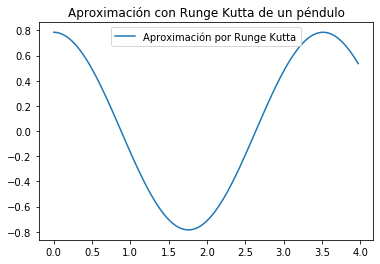

In [254]:
t = np.arange(0, 4*np.pi/omega, (4*np.pi/omega)/101)
plt.title("Aproximación con Runge Kutta de un péndulo")
%time plt.plot(t, O, label = "Aproximación por Runge Kutta")
plt.legend()
plt.show()

Notar que esto parece una gráfica que un coseno, de hecho veamos la comparación:

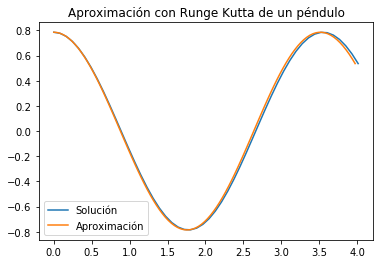

In [239]:
t = np.arange(0, 4*np.pi/omega, (4*np.pi/omega)/101)
t2 = np.linspace(0, 4*np.pi/omega)
plt.title("Aproximación con Runge Kutta de un péndulo")
plt.plot(t2, np.pi/4*np.cos(t2 * omega**(1/2)), label = "Solución")
plt.plot(t, O, label = "Aproximación")
plt.legend()
plt.show()

En la gráfica anterior, se compara un coseno solución a la ecuación diferencial y la aproximación de Runge Kutta, note que son casi la misma gráfica y sólo difieren en muy pocos puntos.

Note que en este código hicimos uso de varias funciones de arreglos de numpy. tofile, fromfile, append, array, zeros, copy, etc... 

Esto fue de increíble conveniencia porque el código se redujo de manera significable y no hay necesidad de escribir cosas innecesarias